In [1]:
import polars as pl

### 1. Data reading


Load parquet file into a polars LazyFrame.


In [2]:
dfs = []
for month in range(1, 13):
    df = pl.scan_parquet(f"../lab/data/{month}.parquet")
    df = df.with_columns(
        pl.col("tpep_pickup_datetime").dt.cast_time_unit("ms"),
        pl.col("tpep_dropoff_datetime").dt.cast_time_unit("ms"),
    )
    dfs.append(df)

df_2024 = pl.concat(dfs)

Load csv file into a polars LazyFrame.


In [3]:
taxi_zones_df = pl.scan_csv("../lab/data/taxi_zone_lookup.csv")

Filter the taxi lf to only include rows from the year 2024.


In [4]:
df_2024 = df_2024.filter(
    pl.col("tpep_pickup_datetime").dt.year() == 2024,
    pl.col("tpep_dropoff_datetime") <= pl.date(2025, 1, 1),
)

Optimize taxi LazyFrame


In [5]:
df_2024.describe()

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.1169064e7,"""41169064""","""41169064""",3.7077867e7,4.1169064e7,3.7077867e7,"""37077867""",4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,3.7077867e7,3.7077867e7
"""null_count""",0.0,"""0""","""0""",4.091197e6,0.0,4.091197e6,"""4091197""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.091197e6,4.091197e6
"""mean""",1.764231,"""2024-07-06 10:06:13.130000""","""2024-07-06 10:23:41.087000""",1.333927,4.976051,2.322168,null,164.243041,163.447651,1.107255,19.268278,1.385948,0.479778,3.307857,0.561511,0.962994,27.832536,2.232153,0.146999
"""std""",0.425858,null,null,0.815821,419.233836,10.928139,null,64.340795,69.599929,0.651506,76.720324,1.815873,0.130182,4.090465,2.240516,0.255053,78.054026,0.87464,0.502031
"""min""",1.0,"""2024-01-01 00:00:00""","""2024-01-01 00:02:42""",0.0,0.0,1.0,"""N""",1.0,1.0,0.0,-2261.2,-9.25,-0.5,-300.0,-140.63,-1.0,-2265.45,-2.5,-1.75
"""25%""",2.0,"""2024-04-06 20:06:26""","""2024-04-06 20:22:54""",1.0,1.01,1.0,null,132.0,113.0,1.0,9.3,0.0,0.5,0.0,0.0,1.0,15.75,2.5,0.0
"""50%""",2.0,"""2024-07-03 23:28:31""","""2024-07-03 23:44:36""",1.0,1.76,1.0,null,161.0,162.0,1.0,13.5,1.0,0.5,2.6,0.0,1.0,21.0,2.5,0.0
"""75%""",2.0,"""2024-10-08 17:30:38""","""2024-10-08 17:50:40""",1.0,3.36,1.0,null,233.0,234.0,1.0,22.6,2.5,0.5,4.25,0.0,1.0,30.6,2.5,0.0
"""max""",7.0,"""2024-12-31 23:59:21""","""2025-01-01 00:00:00""",9.0,398608.62,99.0,"""Y""",265.0,265.0,5.0,335544.44,65.99,41.3,999.99,1702.88,2.0,335550.94,2.52,1.75


In [6]:
df_2024.schema

/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_35828/795530184.py:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  df_2024.schema


Schema([('VendorID', Int32),
        ('tpep_pickup_datetime', Datetime(time_unit='ms', time_zone=None)),
        ('tpep_dropoff_datetime', Datetime(time_unit='ms', time_zone=None)),
        ('passenger_count', Int64),
        ('trip_distance', Float64),
        ('RatecodeID', Int64),
        ('store_and_fwd_flag', String),
        ('PULocationID', Int32),
        ('DOLocationID', Int32),
        ('payment_type', Int64),
        ('fare_amount', Float64),
        ('extra', Float64),
        ('mta_tax', Float64),
        ('tip_amount', Float64),
        ('tolls_amount', Float64),
        ('improvement_surcharge', Float64),
        ('total_amount', Float64),
        ('congestion_surcharge', Float64),
        ('Airport_fee', Float64)])

In [7]:
df_2024 = df_2024.with_columns(
    pl.col("VendorID").cast(pl.UInt8),
    pl.col("passenger_count").cast(pl.UInt8),
    pl.col("RatecodeID").cast(pl.UInt8),
    pl.col("PULocationID").cast(pl.UInt16),
    pl.col("DOLocationID").cast(pl.UInt16),
    pl.col("payment_type").cast(pl.UInt8),
    pl.col("trip_distance").cast(pl.Float32),
    pl.col("fare_amount").cast(pl.Float32),
    pl.col("extra").cast(pl.Float32),
    pl.col("mta_tax").cast(pl.Float32),
    pl.col("tip_amount").cast(pl.Float32),
    pl.col("tolls_amount").cast(pl.Float32),
    pl.col("improvement_surcharge").cast(pl.Float32),
    pl.col("total_amount").cast(pl.Float32),
    pl.col("congestion_surcharge").cast(pl.Float32),
    pl.col("Airport_fee").cast(pl.Float32),
    pl.col("store_and_fwd_flag").cast(pl.Categorical),
)

In [8]:
df_2024.schema

/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_35828/795530184.py:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  df_2024.schema


Schema([('VendorID', UInt8),
        ('tpep_pickup_datetime', Datetime(time_unit='ms', time_zone=None)),
        ('tpep_dropoff_datetime', Datetime(time_unit='ms', time_zone=None)),
        ('passenger_count', UInt8),
        ('trip_distance', Float32),
        ('RatecodeID', UInt8),
        ('store_and_fwd_flag', Categorical),
        ('PULocationID', UInt16),
        ('DOLocationID', UInt16),
        ('payment_type', UInt8),
        ('fare_amount', Float32),
        ('extra', Float32),
        ('mta_tax', Float32),
        ('tip_amount', Float32),
        ('tolls_amount', Float32),
        ('improvement_surcharge', Float32),
        ('total_amount', Float32),
        ('congestion_surcharge', Float32),
        ('Airport_fee', Float32)])

Optimize zones LazyFrame


In [9]:
taxi_zones_df.describe()

statistic,LocationID,Borough,Zone,service_zone
str,f64,str,str,str
"""count""",265.0,"""265""","""265""","""265"""
"""null_count""",0.0,"""0""","""0""","""0"""
"""mean""",133.0,null,null,null
"""std""",76.643112,null,null,null
"""min""",1.0,"""Bronx""","""Allerton/Pelham Gardens""","""Airports"""
"""25%""",67.0,null,null,null
"""50%""",133.0,null,null,null
"""75%""",199.0,null,null,null
"""max""",265.0,"""Unknown""","""Yorkville West""","""Yellow Zone"""


In [10]:
taxi_zones_df = taxi_zones_df.with_columns(
    pl.col("LocationID").cast(pl.Int16),
    pl.col("Borough").cast(pl.Categorical),
    pl.col("Zone").cast(pl.Categorical),
    pl.col("service_zone").cast(pl.Categorical),
)

In [11]:
taxi_zones_df.collect_schema()

Schema([('LocationID', Int16),
        ('Borough', Categorical),
        ('Zone', Categorical),
        ('service_zone', Categorical)])

### 2. Data cleaning and filtering


In [12]:
df_2024.describe()

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.1169064e7,"""41169064""","""41169064""",3.7077867e7,4.1169064e7,3.7077867e7,"""37077867""",4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,3.7077867e7,3.7077867e7
"""null_count""",0.0,"""0""","""0""",4.091197e6,0.0,4.091197e6,"""4091197""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.091197e6,4.091197e6
"""mean""",1.764231,"""2024-07-06 10:06:13.130000""","""2024-07-06 10:23:41.087000""",1.333927,4.97605,2.322168,null,164.243041,163.447651,1.107255,19.268278,1.385948,0.479778,3.307858,0.561511,0.962994,27.832537,2.232153,0.146999
"""std""",0.425858,null,null,0.815821,419.233826,10.928139,null,64.340795,69.599929,0.651506,76.720322,1.815873,0.130182,4.090466,2.240516,0.255053,78.054024,0.87464,0.502031
"""min""",1.0,"""2024-01-01 00:00:00""","""2024-01-01 00:02:42""",0.0,0.0,1.0,null,1.0,1.0,0.0,-2261.199951,-9.25,-0.5,-300.0,-140.630005,-1.0,-2265.449951,-2.5,-1.75
"""25%""",2.0,"""2024-04-06 20:06:26""","""2024-04-06 20:22:54""",1.0,1.01,1.0,null,132.0,113.0,1.0,9.3,0.0,0.5,0.0,0.0,1.0,15.75,2.5,0.0
"""50%""",2.0,"""2024-07-03 23:28:31""","""2024-07-03 23:44:36""",1.0,1.76,1.0,null,161.0,162.0,1.0,13.5,1.0,0.5,2.6,0.0,1.0,21.0,2.5,0.0
"""75%""",2.0,"""2024-10-08 17:30:38""","""2024-10-08 17:50:40""",1.0,3.36,1.0,null,233.0,234.0,1.0,22.6,2.5,0.5,4.25,0.0,1.0,30.6,2.5,0.0
"""max""",7.0,"""2024-12-31 23:59:21""","""2025-01-01 00:00:00""",9.0,398608.625,99.0,null,265.0,265.0,5.0,335544.4375,65.989998,41.299999,999.98999,1702.880005,2.0,335550.9375,2.52,1.75


Fill null values in the "passenger_count" column with 1


In [13]:
df_2024 = df_2024.with_columns(pl.col("passenger_count").fill_null(1))

Remove rides with 0 passengers


In [14]:
df_2024 = df_2024.filter(pl.col("passenger_count") > 0)

Replace passenger_count with 6 if a ride has over 6 passengers


In [15]:
df_2024 = df_2024.with_columns(pl.col("passenger_count").clip(upper_bound=6))

Remove rides lasting over 2 hours


In [16]:
df_2024 = df_2024.filter(
    (
        pl.col("tpep_dropoff_datetime") - pl.col("tpep_pickup_datetime")
    ).dt.total_minutes()
    < 120
)

In all money-related columns, replace values with absolute value to fix negative amounts


In [17]:
df_2024 = df_2024.with_columns(
    pl.col("fare_amount").abs(),
    pl.col("extra").abs(),
    pl.col("mta_tax").abs(),
    pl.col("tip_amount").abs(),
    pl.col("tolls_amount").abs(),
    pl.col("improvement_surcharge").abs(),
    pl.col("total_amount").abs(),
    pl.col("congestion_surcharge").abs(),
    pl.col("Airport_fee").abs(),
)

Remove rides with over 1000 dollars in any money-related column


In [18]:
df_2024 = df_2024.with_columns(
    pl.col("fare_amount").clip(upper_bound=1000),
    pl.col("extra").clip(upper_bound=1000),
    pl.col("mta_tax").clip(upper_bound=1000),
    pl.col("tip_amount").clip(upper_bound=1000),
    pl.col("tolls_amount").clip(upper_bound=1000),
    pl.col("improvement_surcharge").clip(upper_bound=1000),
    pl.col("total_amount").clip(upper_bound=1000),
    pl.col("congestion_surcharge").clip(upper_bound=1000),
    pl.col("Airport_fee").clip(upper_bound=1000),
)

Remove rows with values of RatecodeID or VendorID missing or outside those defined in the data dictionary


In [19]:
df_2024 = df_2024.filter(
    (pl.col("VendorID").is_not_null())
    & (pl.col("RatecodeID").is_not_null())
    & (pl.col("VendorID").is_in([1, 2, 6, 7]))
    & (pl.col("RatecodeID").is_in([1, 2, 3, 4, 5, 6, 99]))
)

In [20]:
df_2024.describe()

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",3.663524e7,"""36635240""","""36635240""",3.663524e7,3.663524e7,3.663524e7,"""36635240""",3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7
"""null_count""",0.0,"""0""","""0""",0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.769662,"""2024-07-05 17:21:33.660000""","""2024-07-05 17:38:13.489000""",1.3483,3.500941,2.291132,null,164.974237,164.290253,1.229276,19.913923,1.547185,0.493484,3.595956,0.619858,0.992087,29.083256,2.299824,0.156961
"""std""",0.421273,null,null,0.807489,85.858627,10.791904,null,63.332206,69.341322,0.567188,18.840296,1.815981,0.057169,4.143783,2.288974,0.088493,23.515465,0.678505,0.500044
"""min""",1.0,"""2024-01-01 00:00:00""","""2024-01-01 00:02:42""",1.0,0.0,1.0,null,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",2.0,"""2024-04-05 15:17:29""","""2024-04-05 15:37:34""",1.0,1.0,1.0,null,132.0,114.0,1.0,9.3,0.0,0.5,1.0,0.0,1.0,15.96,2.5,0.0
"""50%""",2.0,"""2024-07-03 16:10:09""","""2024-07-03 16:28:33""",1.0,1.7,1.0,null,162.0,162.0,1.0,13.5,1.0,0.5,2.86,0.0,1.0,21.0,2.5,0.0
"""75%""",2.0,"""2024-10-08 19:41:43""","""2024-10-08 19:57:57""",1.0,3.27,1.0,null,233.0,234.0,1.0,21.9,2.5,0.5,4.45,0.0,1.0,30.940001,2.5,0.0
"""max""",7.0,"""2024-12-31 23:59:21""","""2025-01-01 00:00:00""",6.0,160244.90625,99.0,null,265.0,265.0,5.0,1000.0,65.989998,35.84,999.98999,1000.0,1.0,1000.0,2.52,1.75


### 3. Data transformation


Combine payment type values of "No charge", "Dispute", "Unknown" and "Voided trip" into "Other"


In [21]:
df_2024 = df_2024.with_columns(
    pl.when(pl.col("payment_type").is_in([3, 4, 5, 6]))
    .then(pl.lit(0))
    .otherwise(pl.col("payment_type"))
    .alias("payment_type")
)

Replace PULocationID and DOLocationID with borough names


In [22]:
df_2024 = (
    df_2024.join(
        taxi_zones_df.select(pl.col("LocationID"), pl.col("Borough")),
        left_on="PULocationID",
        right_on="LocationID",
        how="left",
    )
    .rename({"Borough": "PUBorough"})
    .join(
        taxi_zones_df.select(pl.col("LocationID", "Borough")),
        left_on="DOLocationID",
        right_on="LocationID",
    )
    .rename({"Borough": "DOBorough"})
)

In [23]:
df_2024 = df_2024.drop(["PULocationID", "DOLocationID"])

Add boolean variable is_airport_ride


In [24]:
df_2024 = df_2024.with_columns(
    pl.when(pl.col("Airport_fee") > 0)
    .then(True)
    .otherwise(False)
    .alias("is_airport_ride")
)

In [25]:
df_2024.describe()

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PUBorough,DOBorough,is_airport_ride
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64
"""count""",3.663524e7,"""36635240""","""36635240""",3.663524e7,3.663524e7,3.663524e7,"""36635240""",3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,"""36635240""","""36635240""",3.663524e7
"""null_count""",0.0,"""0""","""0""",0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0
"""mean""",1.769662,"""2024-07-05 17:21:33.660000""","""2024-07-05 17:38:13.489000""",1.3483,3.500941,2.291132,null,1.1198,19.913923,1.547185,0.493484,3.595956,0.619858,0.992087,29.083256,2.299824,0.156961,null,null,0.089692
"""std""",0.421273,null,null,0.807489,85.858627,10.791904,null,0.405007,18.840296,1.815981,0.057169,4.143783,2.288974,0.088493,23.515465,0.678505,0.500044,null,null,null
"""min""",1.0,"""2024-01-01 00:00:00""","""2024-01-01 00:02:42""",1.0,0.0,1.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,0.0
"""25%""",2.0,"""2024-04-05 15:17:29""","""2024-04-05 15:37:34""",1.0,1.0,1.0,null,1.0,9.3,0.0,0.5,1.0,0.0,1.0,15.96,2.5,0.0,null,null,null
"""50%""",2.0,"""2024-07-03 16:10:09""","""2024-07-03 16:28:33""",1.0,1.7,1.0,null,1.0,13.5,1.0,0.5,2.86,0.0,1.0,21.0,2.5,0.0,null,null,null
"""75%""",2.0,"""2024-10-08 19:41:43""","""2024-10-08 19:57:57""",1.0,3.27,1.0,null,1.0,21.9,2.5,0.5,4.45,0.0,1.0,30.940001,2.5,0.0,null,null,null
"""max""",7.0,"""2024-12-31 23:59:21""","""2025-01-01 00:00:00""",6.0,160244.90625,99.0,null,2.0,1000.0,65.989998,35.84,999.98999,1000.0,1.0,1000.0,2.52,1.75,null,null,1.0


Add boolean variable is_rush_hour


In [27]:
from datetime import time

df_2024 = df_2024.with_columns(
    pl.when(
        (pl.col("tpep_pickup_datetime").dt.weekday() < 6)
        & (
            (
                pl.col("tpep_pickup_datetime")
                .dt.time()
                .is_between(time(6, 30), time(9, 30))
            )
            | (
                pl.col("tpep_pickup_datetime")
                .dt.time()
                .is_between(time(15, 30), time(20, 00))
            )
        )
    )
    .then(True)
    .otherwise(False)
    .alias("is_rush_hour")
)

In [28]:
df_2024.describe()

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PUBorough,DOBorough,is_airport_ride,is_rush_hour
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64
"""count""",3.663524e7,"""36635240""","""36635240""",3.663524e7,3.663524e7,3.663524e7,"""36635240""",3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,3.663524e7,"""36635240""","""36635240""",3.663524e7,3.663524e7
"""null_count""",0.0,"""0""","""0""",0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0
"""mean""",1.769662,"""2024-07-05 17:21:33.660000""","""2024-07-05 17:38:13.489000""",1.3483,3.500941,2.291132,null,1.1198,19.913923,1.547185,0.493484,3.595956,0.619858,0.992087,29.083256,2.299824,0.156961,null,null,0.089692,0.299134
"""std""",0.421273,null,null,0.807489,85.858627,10.791904,null,0.405007,18.840296,1.815981,0.057169,4.143783,2.288974,0.088493,23.515465,0.678505,0.500044,null,null,null,null
"""min""",1.0,"""2024-01-01 00:00:00""","""2024-01-01 00:02:42""",1.0,0.0,1.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,0.0,0.0
"""25%""",2.0,"""2024-04-05 15:17:29""","""2024-04-05 15:37:34""",1.0,1.0,1.0,null,1.0,9.3,0.0,0.5,1.0,0.0,1.0,15.96,2.5,0.0,null,null,null,null
"""50%""",2.0,"""2024-07-03 16:10:09""","""2024-07-03 16:28:33""",1.0,1.7,1.0,null,1.0,13.5,1.0,0.5,2.86,0.0,1.0,21.0,2.5,0.0,null,null,null,null
"""75%""",2.0,"""2024-10-08 19:41:43""","""2024-10-08 19:57:57""",1.0,3.27,1.0,null,1.0,21.9,2.5,0.5,4.45,0.0,1.0,30.940001,2.5,0.0,null,null,null,null
"""max""",7.0,"""2024-12-31 23:59:21""","""2025-01-01 00:00:00""",6.0,160244.90625,99.0,null,2.0,1000.0,65.989998,35.84,999.98999,1000.0,1.0,1000.0,2.52,1.75,null,null,1.0,1.0


### 4. Feature extraction


apply dummy encoding to features:

- payment type
- pickup borough
- dropoff borough


payment_type is Uint8, why encode that?


In [29]:
df = df_2024.collect().to_dummies(["POBorough", "DOBorough"])

Add integer variables for counting daily events:

- total number of rides (target variable)
- total number of airport rides
- total number of rush hour rides


In [30]:
df_daily_events = df_2024.group_by(pl.col("tpep_pickup_datetime").dt.date().alias("date")).agg(
    pl.len().alias("total_rides"),
    pl.col("is_airport_ride").sum().alias("airport_rides"),
    pl.col("is_rush_hour").sum().alias("rush_hour_rides"),
)

Add features aggregating daily rides information:

- average fare amount
- median distance
- sum of total amounts
- total amount paid by card, cash, and other
- total congestion surcharge
- total number of passengers


In [31]:
df_daily_info = df_2024.group_by(pl.col("tpep_pickup_datetime").dt.date().alias("date")).agg(
    pl.col("fare_amount").mean().alias("average_fare_amount"),
    pl.col("trip_distance").median().alias("mean_distance"),
    pl.col("total_amount").sum().alias("total_amt_sum"),
    pl.col("payment_type").is_in([0]).sum().alias("total_amt_other"),
    pl.col("payment_type").is_in([1]).sum().alias("total_amt_card"),
    pl.col("payment_type").is_in([2]).sum().alias("total_amt_cash"),
    pl.col("congestion_surcharge").sum().alias("total_congestion_surcharge"),
    pl.col("passenger_count").sum().alias("total_passengers"),
)

In [32]:
df_daily = df_daily_events.join(df_daily_info, on='date')

In [33]:
df_daily = df_daily.with_columns(
    pl.col("date").dt.weekday().alias("day_of_week"),
    pl.col("date").dt.weekday().is_in([6, 7]).alias("is_weekend"),
    pl.col("date").dt.day().alias("day_of_month"),
    pl.col("date").dt.month().alias("month"),
    pl.col("date").dt.quarter().alias("quarter")
)

In [34]:
df_daily.collect_schema()

Schema([('date', Date),
        ('total_rides', UInt32),
        ('airport_rides', UInt32),
        ('rush_hour_rides', UInt32),
        ('average_fare_amount', Float32),
        ('mean_distance', Float32),
        ('total_amt_sum', Float32),
        ('total_amt_other', UInt32),
        ('total_amt_card', UInt32),
        ('total_amt_cash', UInt32),
        ('total_congestion_surcharge', Float32),
        ('total_passengers', Int64),
        ('day_of_week', Int8),
        ('is_weekend', Boolean),
        ('day_of_month', Int8),
        ('month', Int8),
        ('quarter', Int8)])

In [35]:
df_daily.collect().write_parquet("../lab/data/dataset.parquet", compression='zstd')

### Data analysis

Dataset Shape

In [36]:
df_daily.collect().shape

(366, 17)

Top 5 rows

In [37]:
df_daily.collect().head()

date,total_rides,airport_rides,rush_hour_rides,average_fare_amount,mean_distance,total_amt_sum,total_amt_other,total_amt_card,total_amt_cash,total_congestion_surcharge,total_passengers,day_of_week,is_weekend,day_of_month,month,quarter
date,u32,u32,u32,f32,f32,f32,u32,u32,u32,f32,i64,i8,bool,i8,i8,i8
2024-08-19,79023,12074,33332,22.655487,1.83,2.5682e6,2906,62655,13462,171967.5,104851,1,false,19,8,3
2024-07-29,83325,10144,35202,20.56291,1.78,2.4974e6,2812,66571,13942,186280.0,111663,1,false,29,7,3
2024-04-04,114360,10380,45950,19.728214,1.7,3.3373e6,2756,94888,16716,263692.5,151775,4,false,4,4,2
2024-08-10,83009,7414,0,20.12928,1.8,2.3625e6,3122,65643,14244,189292.5,122112,6,true,10,8,3
2024-03-17,88196,10120,0,21.21418,1.9,2.6867e6,2598,71562,14036,201257.5,123712,7,true,17,3,1


DataFrame statistics

In [38]:
df_daily.describe()

statistic,date,total_rides,airport_rides,rush_hour_rides,average_fare_amount,mean_distance,total_amt_sum,total_amt_other,total_amt_card,total_amt_cash,total_congestion_surcharge,total_passengers,day_of_week,is_weekend,day_of_month,month,quarter
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""366""",366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""","""2024-07-01 12:00:00""",100096.284153,8977.849727,29942.191257,19.952482,1.718634,2.9112e6,2931.956284,82240.885246,14923.442623,230203.796875,134959.773224,3.986339,0.284153,15.756831,6.513661,2.505464
"""std""",null,15372.278378,1716.363211,19694.163496,1.20462,0.10091,461532.53125,554.320874,14161.094428,1357.233058,37864.675781,18725.114675,2.006108,null,8.823592,3.455958,1.119551
"""min""","""2024-01-01""",47390.0,3355.0,0.0,16.676249,1.5,1.3260e6,1656.0,34052.0,10244.0,107825.0,74198.0,1.0,0.0,1.0,1.0,1.0
"""25%""","""2024-04-01""",89572.0,7869.0,0.0,19.125853,1.66,2.5819e6,2566.0,72543.0,14109.0,203501.0,122219.0,2.0,null,8.0,4.0,2.0
"""50%""","""2024-07-02""",100781.0,9018.0,39519.0,19.950588,1.7,2.916561e6,2910.0,83419.0,14966.0,232817.5,134078.0,4.0,null,16.0,7.0,3.0
"""75%""","""2024-10-01""",110799.0,10144.0,44782.0,20.713577,1.77,3.222885e6,3271.0,91738.0,15834.0,256939.5,147187.0,6.0,null,23.0,10.0,4.0
"""max""","""2024-12-31""",141676.0,14903.0,56567.0,24.447693,2.2,4.4621e6,4596.0,120976.0,17994.0,330475.0,199440.0,7.0,1.0,31.0,12.0,4.0


Schema

In [39]:
df_daily.collect_schema()

Schema([('date', Date),
        ('total_rides', UInt32),
        ('airport_rides', UInt32),
        ('rush_hour_rides', UInt32),
        ('average_fare_amount', Float32),
        ('mean_distance', Float32),
        ('total_amt_sum', Float32),
        ('total_amt_other', UInt32),
        ('total_amt_card', UInt32),
        ('total_amt_cash', UInt32),
        ('total_congestion_surcharge', Float32),
        ('total_passengers', Int64),
        ('day_of_week', Int8),
        ('is_weekend', Boolean),
        ('day_of_month', Int8),
        ('month', Int8),
        ('quarter', Int8)])

Histogram of daily number of rides

In [40]:
pd_df = df_daily.sort(pl.col("date"), descending=False).collect().to_pandas()

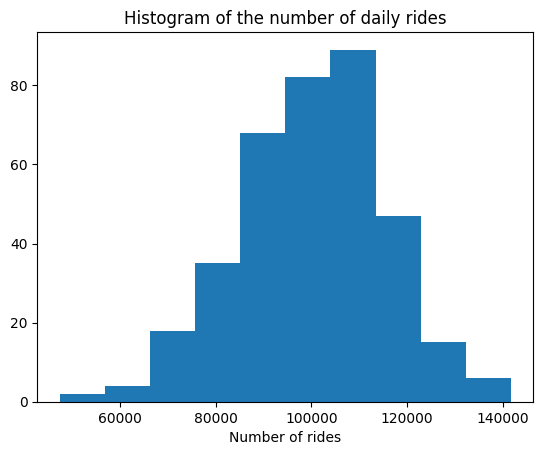

In [41]:
import matplotlib.pyplot as plt

plt.hist(pd_df["total_rides"])
plt.title("Histogram of the number of daily rides")
plt.xlabel("Number of rides")
plt.show()

Line plot of number of rides

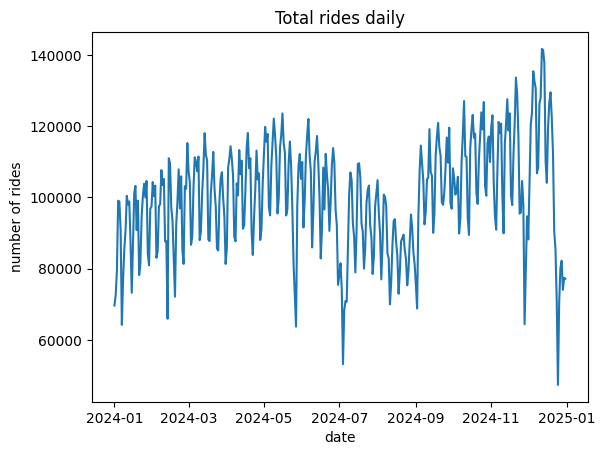

In [42]:
plt.plot(pd_df["date"], pd_df["total_rides"])
plt.title("Total rides daily")
plt.xlabel("date")
plt.ylabel("number of rides")
plt.show()